# JEM092 Asset Pricing - Homework 1

<span style='background:yellow'> **Group : 20107894**</span>

Team Member:

Yanqi Guan : 20107894@fsv.cuni.cz

Lin Zhang : 15845542@fsv.cuni.cz

Jiayi Zeng : 46566215@fsv.cuni.cz


### Task 1 - Data download (8 pts)
In the previous step, you were assigned firms for which you will get the data. You will download 
* daily adjusted close price and volume data from www.finance.yahoo.com
* Market Capitalization and Book Value per Share data from www.macrotrends.net
* Sample period: 01.01.2007 - 28.02.2022 

##### 

In [36]:
# Setup environment
Sys.setenv(LANG = "en")
#options(warn = -1)  # suppressing warnings
#library(repr)

# Import base packages.
library(methods)
# Import third-party packages.
# portfolio packages
library(PortfolioAnalytics)
library(quadprog)
library(quantmod)
library(ROI)
library(ROI.plugin.glpk)
library(ROI.plugin.quadprog)

options(repr.plot.width = 10, repr.plot.height = 8) # define plot size

In [37]:
# read data from file
#smbs <- read.csv('20107894_rand_download.csv',sep = ';',colClasses = "character")
smbs <- read.csv('20107894_rand_download.csv',colClasses = "character")
head(smbs)

,X,x
,<chr>,<chr>
1,1,ABT
2,2,CMS
3,3,PNR
4,4,AVB
5,5,IEX
6,6,SBAC


In [38]:
symbols <- smbs[[2]]
symbols

[1] "ABT"  "CMS"  "PNR"  "AVB"  "IEX"  "SBAC" "QCOM" "BWA"  "WMB"  "DRI" 
[11] "WBA"  "VLO"  "CAT"  "NRG"  "MCK"  "STZ"  "ZBRA" "MHK"  "LRCX" "YUM"

In [39]:
#download data
data <- lapply(symbols, function(y)
{
    try(getSymbols(y, auto.assign = FALSE,from = as.Date('2007-01-01'), to = '2022-02-28'),silent=TRUE)
})


In [40]:
#Assign symbols name
names(data) <- symbols

In [71]:
# check if all symbols is valid
length(data)
# check the date range
head(data[[1]])
tail(data[[1]])

[1] 20

           ABT.Adjusted
2007-01-03     13.37988
2007-01-04     13.63398
2007-01-05     13.63398
2007-01-08     13.68317
2007-01-09     13.80339
2007-01-10     13.93749

           ABT.Adjusted
2022-02-17       120.58
2022-02-18       116.79
2022-02-22       117.51
2022-02-23       117.25
2022-02-24       118.72
2022-02-25       122.41

In [84]:
# check all symbols get data
lapply(data, head)

$ABT
           ABT.Open ABT.High  ABT.Low ABT.Close ABT.Volume ABT.Adjusted
2007-01-03 23.42863 23.74530 23.39025  23.49581   11214881     13.37988
2007-01-04 23.53899 24.10515 23.49581  23.94202   21185494     13.63398
2007-01-05 23.94202 23.99000 23.63975  23.94202   14649854     13.63398
2007-01-08 23.90364 24.05237 23.81727  24.02838   12734681     13.68317
2007-01-09 24.06197 24.30667 23.99000  24.23950   16969154     13.80339
2007-01-10 24.09556 24.20111 23.99000  24.17712   13823885     13.93749

$CMS
           CMS.Open CMS.High CMS.Low CMS.Close CMS.Volume CMS.Adjusted
2007-01-03    16.76    16.86   16.65     16.81    2915800    10.321413
2007-01-04    16.76    16.88   16.66     16.74    1271100    10.278436
2007-01-05    16.65    16.69   16.42     16.47    3123700    10.112650
2007-01-08    16.43    16.55   16.32     16.40    1250600    10.069672
2007-01-09    16.38    16.46   16.20     16.30    5225200    10.008274
2007-01-10    16.25    16.31   16.11     16.15    1366700  

In [80]:
#data0 <- data # backup original data
data <- data0 # restore data in case of wrong doing

In [81]:

# filter for Adjusted price
data <- lapply(names(data), function(y){
    data[[y]] <- data[[y]][, c(paste0(y, '.Volume'),paste0(y, '.Adjusted'))]
})
names(data) <- names(data0)
# check the date range
head(data[[1]])
tail(data[[1]])

           ABT.Volume ABT.Adjusted
2007-01-03   11214881     13.37988
2007-01-04   21185494     13.63398
2007-01-05   14649854     13.63398
2007-01-08   12734681     13.68317
2007-01-09   16969154     13.80339
2007-01-10   13823885     13.93749

           ABT.Volume ABT.Adjusted
2022-02-17    3688300       120.58
2022-02-18   12376100       116.79
2022-02-22    8372800       117.51
2022-02-23    5184200       117.25
2022-02-24    6252600       118.72
2022-02-25    5837700       122.41

In [82]:
data1 <- data # keep data1 for backup

In [85]:
data <- lapply(names(data), function(y){
    data[[y]] <- data[[y]][, paste0(y, '.Adjusted')]
})

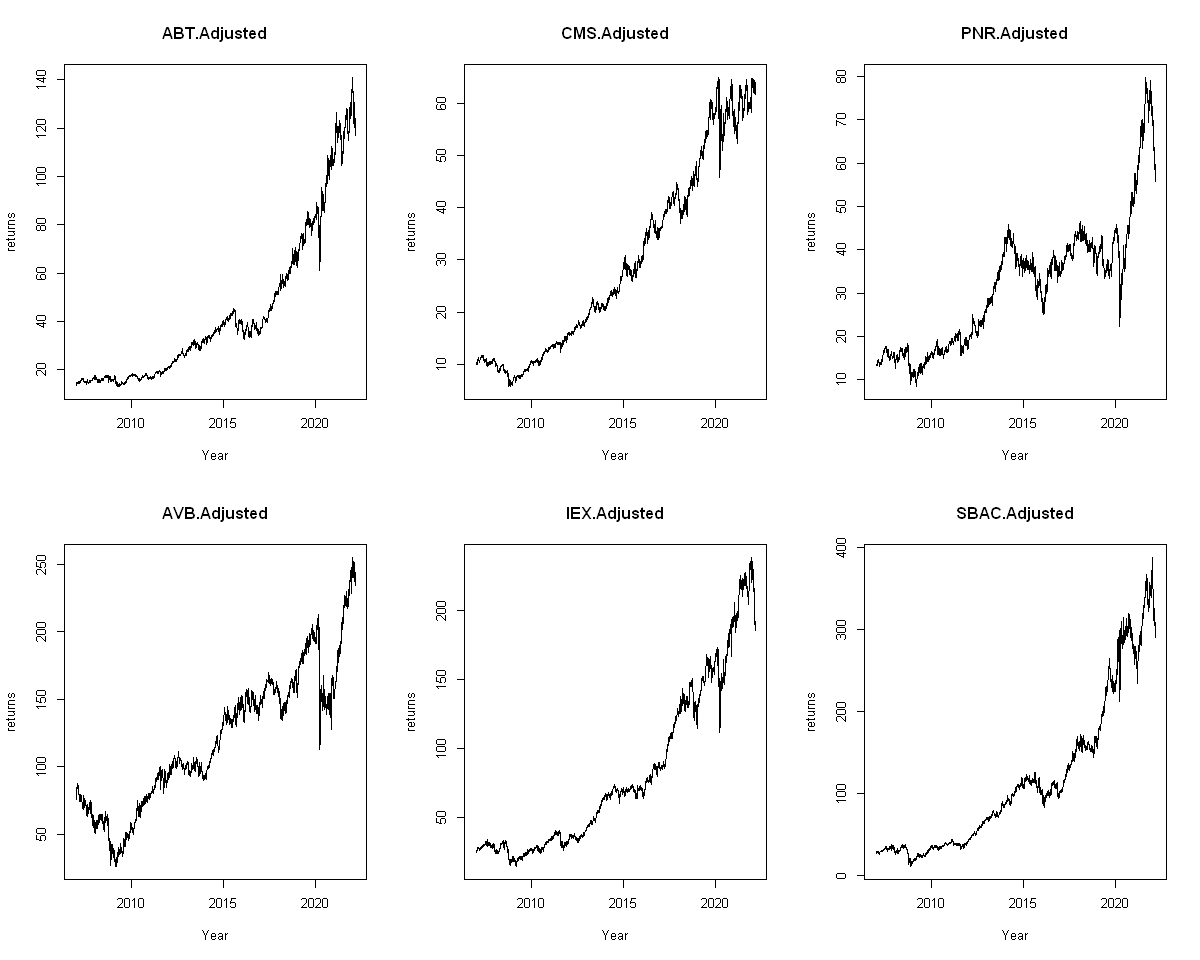

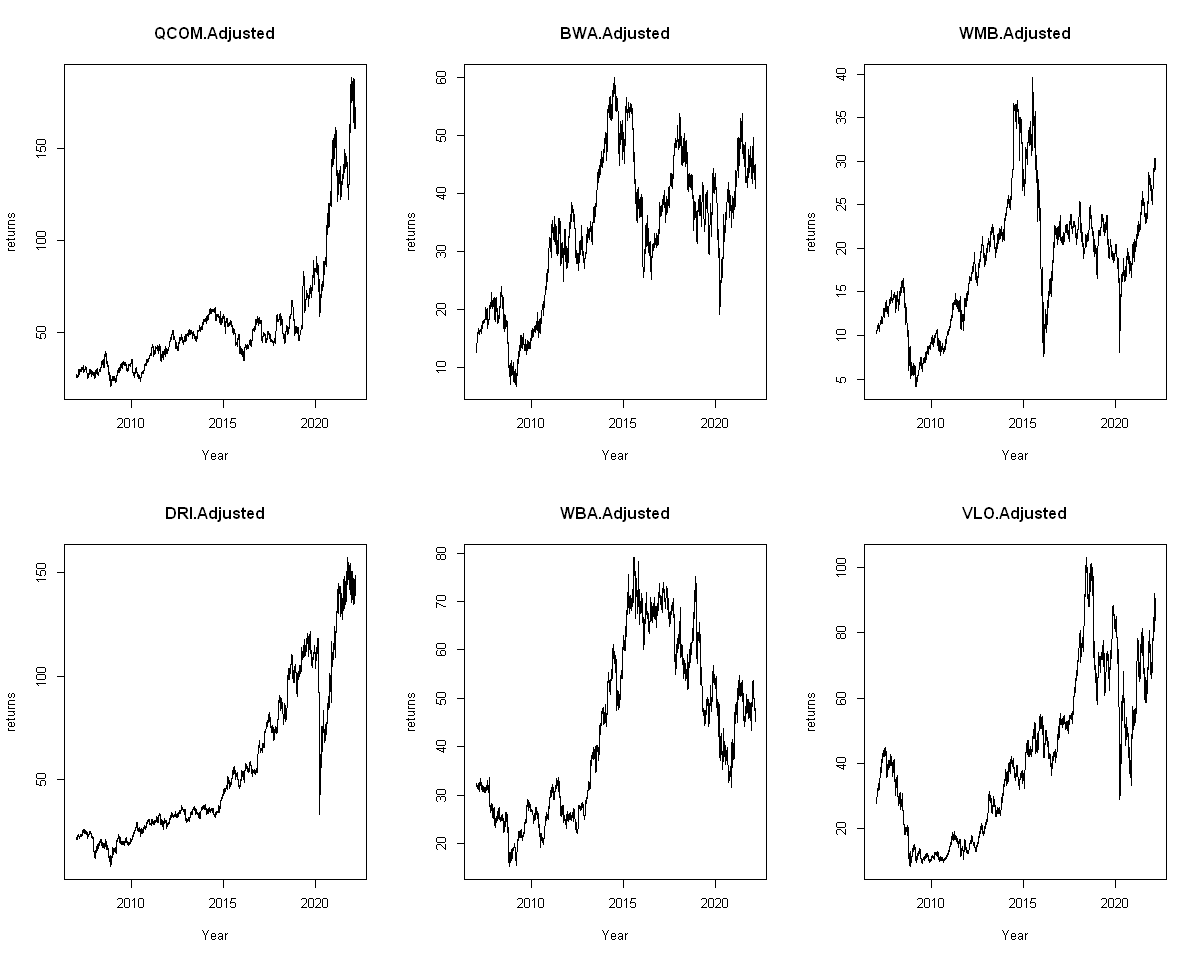

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
NULL

[[19]]
NULL

[[20]]
NULL

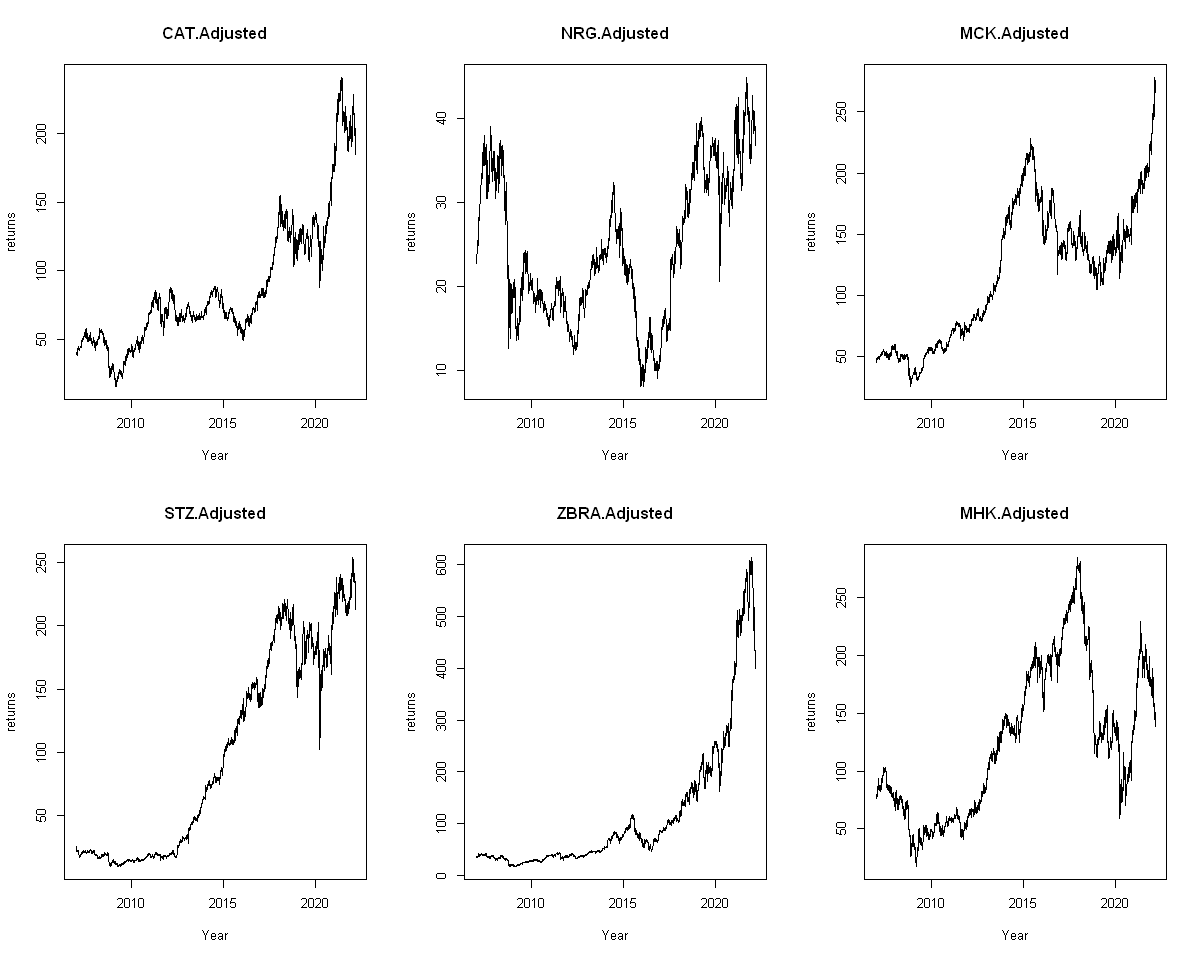

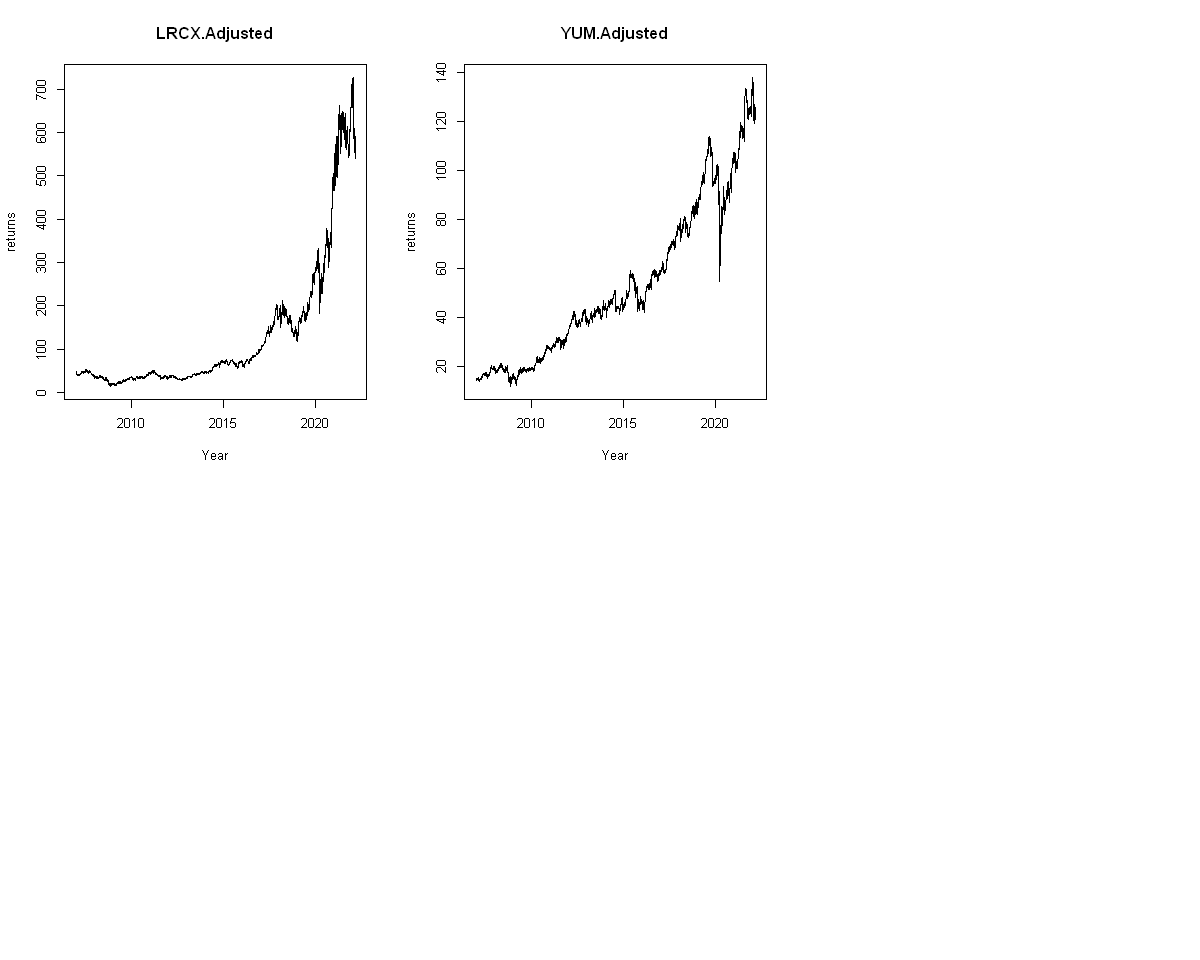

In [76]:
par(mfrow = c(2, 3))
sapply(data, function(y){
    plot(as.Date(index(y)), y, type = 'l', main = names(y), xlab = 'Year',
     ylab = 'returns' )
})

